In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

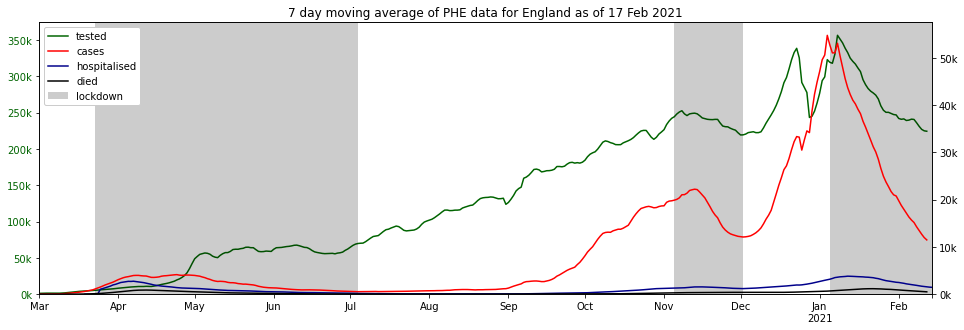

In [19]:
plot_summary(earliest_date='2020-03-01')

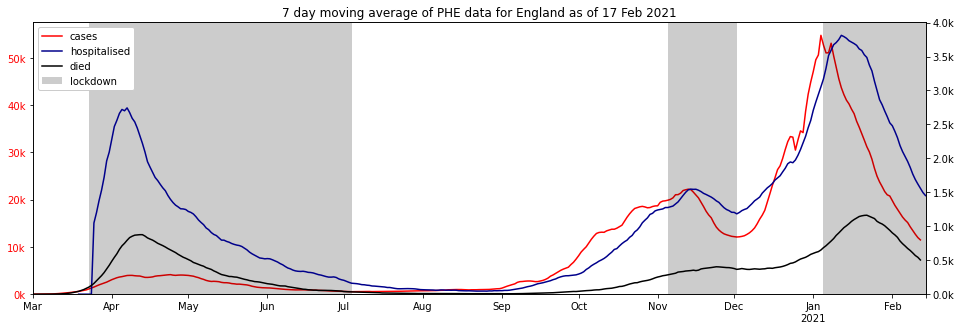

In [20]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,495704.0,13395338.0,12899634.0,56286961,0.880673,22.917624,76.201703
1,Northern Ireland,N92000002,29476.0,418209.0,388733.0,1893667,1.556557,20.528055,77.915389
2,Scotland,S92000003,20409.0,1320074.0,1299665.0,5463300,0.373565,23.789010,75.837424
3,Wales,W92000004,12988.0,807351.0,794363.0,3152879,0.411941,25.194846,74.393213


'partial: 15,940,972'

'full: 558,577'

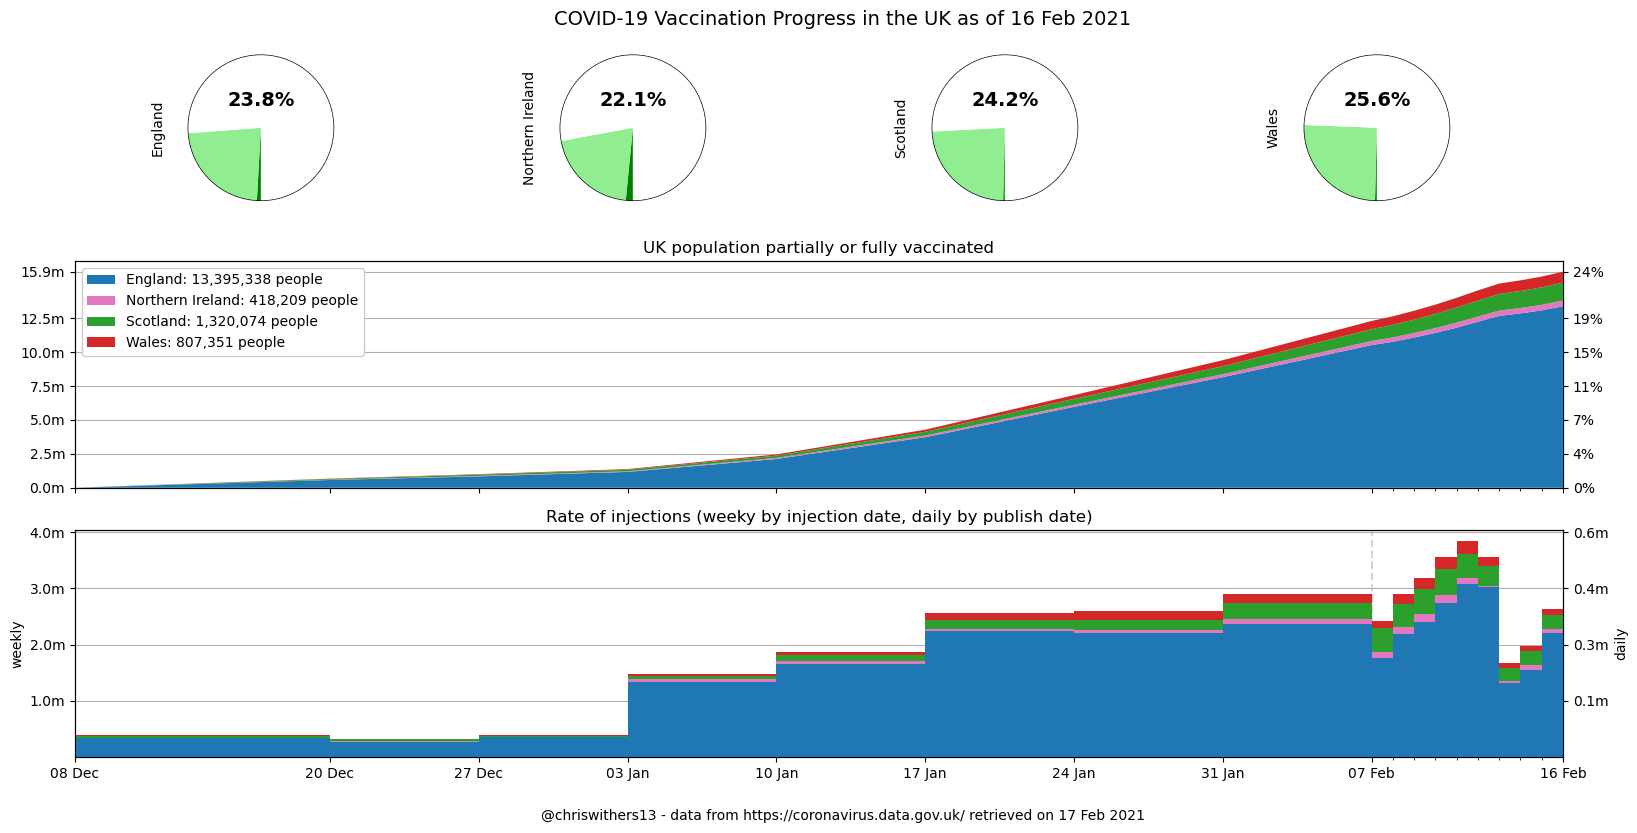

In [21]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [22]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,16 Feb 21,"+312,669","+3,128","+3,128","+13,395,338","+495,704","+495,704"
Northern Ireland,16 Feb 21,"+8,702",+275,+275,"+418,209","+29,476","+29,476"
Scotland,16 Feb 21,"+32,070","+3,272","+3,272","+1,320,074","+20,409","+20,409"
Wales,16 Feb 21,"+11,424","+5,737","+5,737","+807,351","+12,988","+12,988"


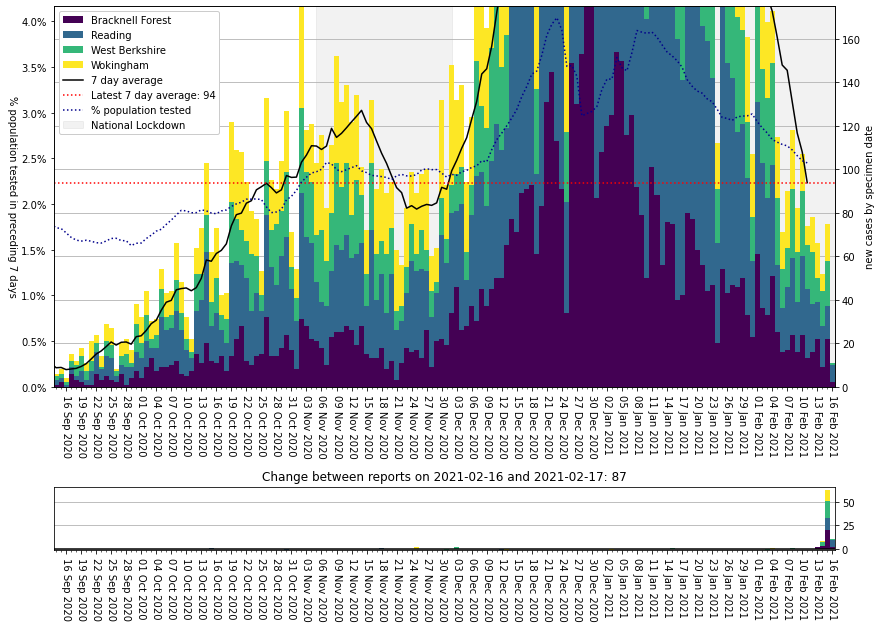

In [23]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

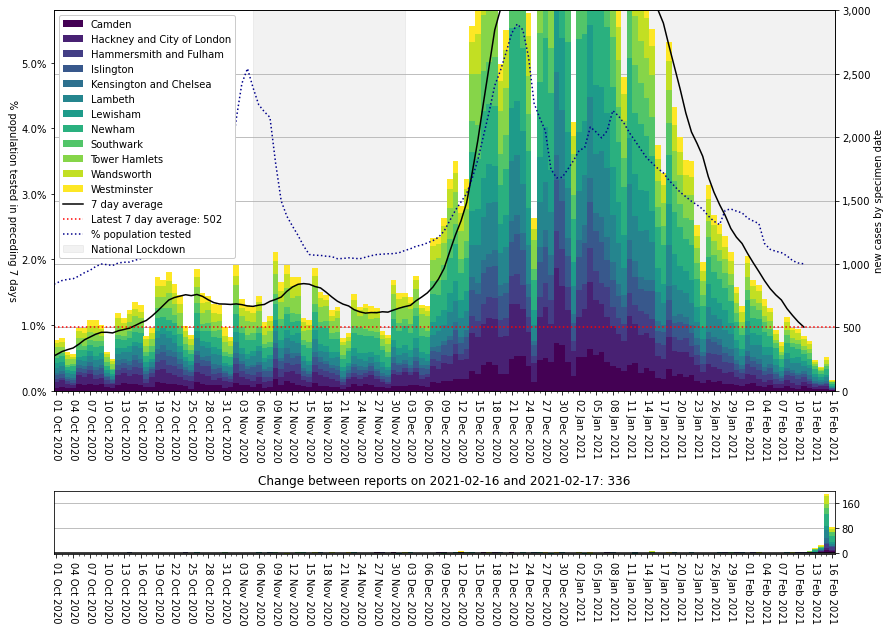

In [24]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [25]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [26]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,289.401534,209.0,2021-02-16
E06000002,Middlesbrough,275.216343,388.0,2021-02-16
S12000008,East Ayrshire,272.108844,332.0,2021-02-16
E08000028,Sandwell,226.518496,744.0,2021-02-16
E07000170,Ashfield,222.017230,284.0,2021-02-16
E08000013,St. Helens,219.287316,396.0,2021-02-16
E06000016,Leicester,214.835810,761.0,2021-02-16
E06000032,Luton,208.869196,445.0,2021-02-16
E07000174,Mansfield,206.745767,226.0,2021-02-16


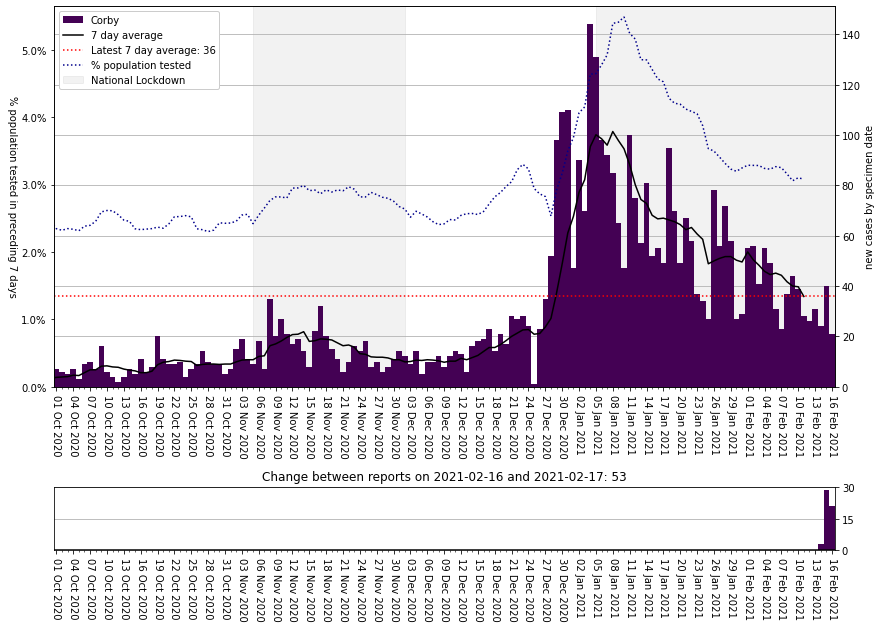

In [27]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [28]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,156.767815,1790.0,2021-02-16
E08000035,Leeds,136.672134,1084.0,2021-02-16
E08000032,Bradford,169.144238,913.0,2021-02-16
E08000003,Manchester,151.575992,838.0,2021-02-16
E06000016,Leicester,214.835810,761.0,2021-02-16
S12000049,Glasgow City,118.460955,750.0,2021-02-16
E08000028,Sandwell,226.518496,744.0,2021-02-16
E06000047,County Durham,136.390904,723.0,2021-02-16
E08000012,Liverpool,144.365335,719.0,2021-02-16


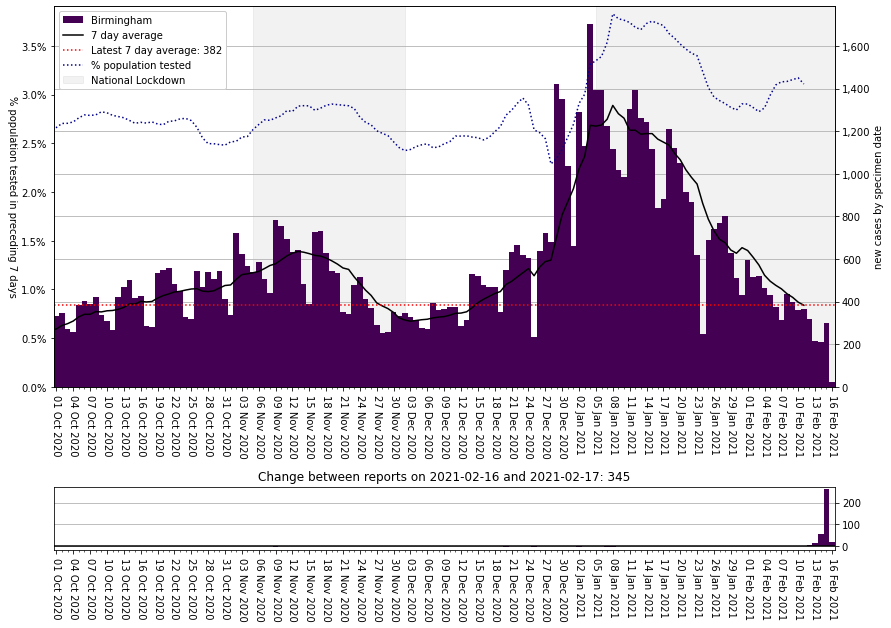

In [29]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [30]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)

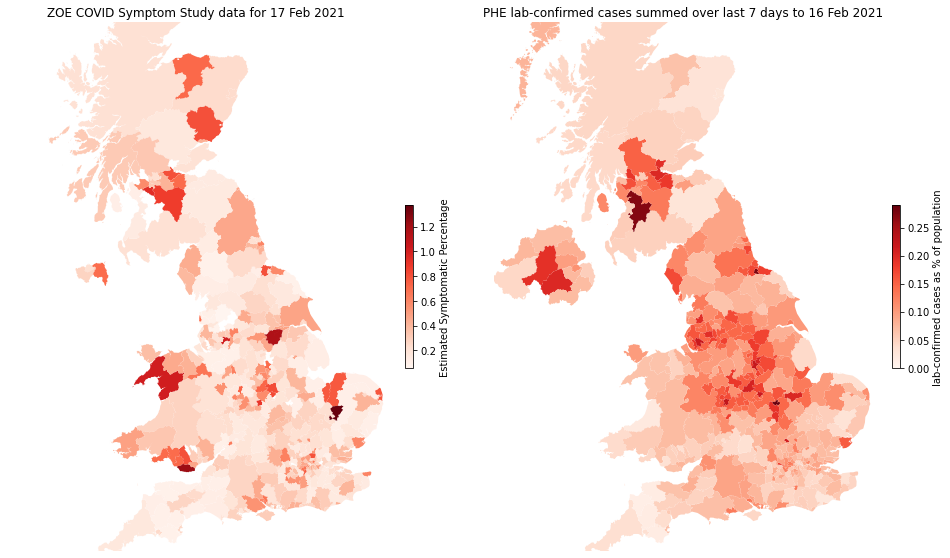

In [31]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)   

In [32]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)

Loading BokehJS ...

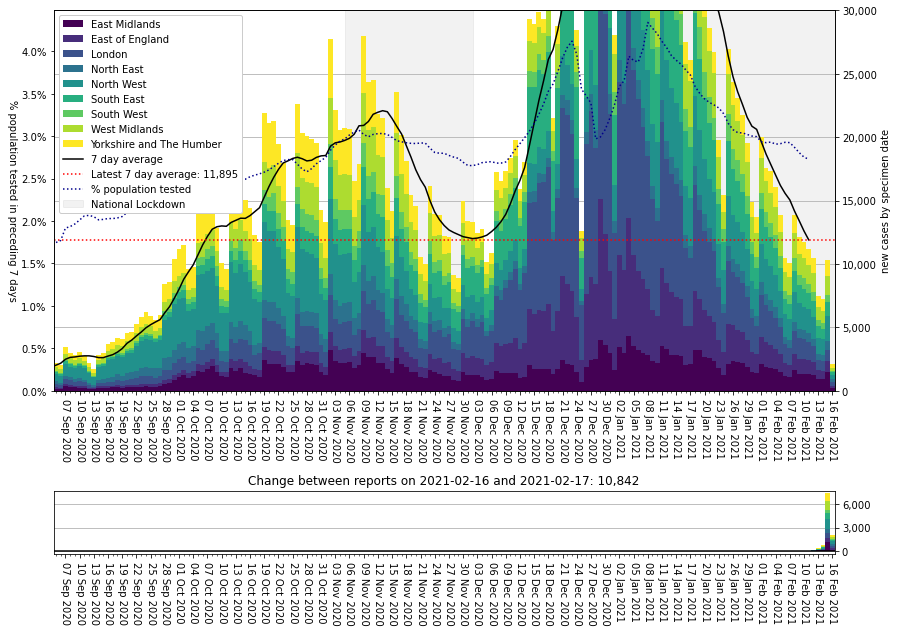

In [33]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

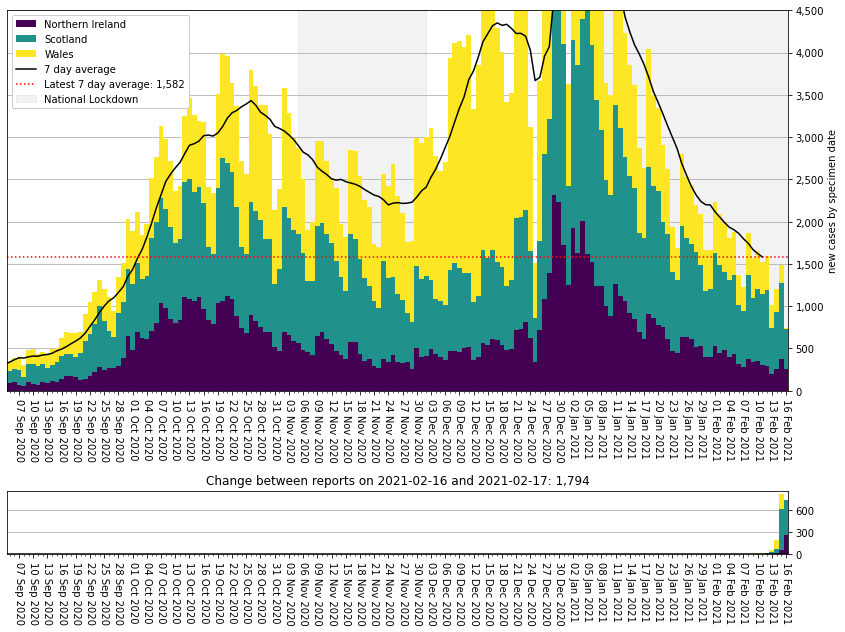

In [34]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')